# Load data into Spark DataFrame

In [1]:
from pyspark import SparkContext
from pyspark import SparkConf

In [2]:
import pyspark.sql.functions as F

In [3]:
# reset the conf of spark
spark.sparkContext._conf.getAll()

[('spark.app.id', 'local-1545001444731'),
 ('spark.sql.catalogImplementation', 'hive'),
 ('spark.rdd.compress', 'True'),
 ('spark.serializer.objectStreamReset', '100'),
 ('spark.master', 'local[*]'),
 ('spark.executor.id', 'driver'),
 ('spark.submit.deployMode', 'client'),
 ('spark.driver.host', '192.168.1.102'),
 ('spark.app.name', 'PySparkShell'),
 ('spark.ui.showConsoleProgress', 'true'),
 ('spark.driver.port', '61715')]

In [4]:
# We use matplotlib for plotting
import matplotlib.pyplot as plt

# This statement allow to display plot without asking to
%matplotlib inline

In [5]:
sc

<SparkContext master=local[*] appName=PySparkShell>

In [6]:
df = spark.read.csv('../../../../../../data/event_ds.csv',header=True).cache()
df

DataFrame[uid: string, event: string, song_id: string, date: string]

In [7]:
df.count()

12252920

In [8]:
df.show()

+---------+-----+--------+----------+
|      uid|event| song_id|      date|
+---------+-----+--------+----------+
|168551373|    P| 3378911|2017-03-30|
|168550728|    P|  285233|2017-03-30|
|168530479|    P| 1676759|2017-03-30|
|168551626|    P| 8131487|2017-03-30|
|168535909|    P| 7145935|2017-03-30|
|168534518|    P|23492124|2017-03-30|
|168549973|    P| 3194852|2017-03-30|
|168551235|    P|  956342|2017-03-30|
|168551539|    P| 1217815|2017-03-30|
|168547320|    P|       0|2017-03-30|
|168550532|    P|   79479|2017-03-30|
|168551351|    P|23490236|2017-03-30|
|168549973|    P| 6461995|2017-03-30|
|168551101|    P|  238435|2017-03-30|
|168550208|    P| 3429202|2017-03-30|
|168544253|    P| 1190655|2017-03-30|
|168551451|    P| 7149583|2017-03-30|
|168551235|    P|  988669|2017-03-30|
|168541064|    P| 6120222|2017-03-30|
|168551084|    P| 6414906|2017-03-30|
+---------+-----+--------+----------+
only showing top 20 rows



In [9]:
# create new or overwrite original field with withColumn
df1 = df.withColumn('date',F.col('date').cast('date'))
df1

DataFrame[uid: string, event: string, song_id: string, date: date]

In [10]:
df1.show()

+---------+-----+--------+----------+
|      uid|event| song_id|      date|
+---------+-----+--------+----------+
|168551373|    P| 3378911|2017-03-30|
|168550728|    P|  285233|2017-03-30|
|168530479|    P| 1676759|2017-03-30|
|168551626|    P| 8131487|2017-03-30|
|168535909|    P| 7145935|2017-03-30|
|168534518|    P|23492124|2017-03-30|
|168549973|    P| 3194852|2017-03-30|
|168551235|    P|  956342|2017-03-30|
|168551539|    P| 1217815|2017-03-30|
|168547320|    P|       0|2017-03-30|
|168550532|    P|   79479|2017-03-30|
|168551351|    P|23490236|2017-03-30|
|168549973|    P| 6461995|2017-03-30|
|168551101|    P|  238435|2017-03-30|
|168550208|    P| 3429202|2017-03-30|
|168544253|    P| 1190655|2017-03-30|
|168551451|    P| 7149583|2017-03-30|
|168551235|    P|  988669|2017-03-30|
|168541064|    P| 6120222|2017-03-30|
|168551084|    P| 6414906|2017-03-30|
+---------+-----+--------+----------+
only showing top 20 rows



In [55]:
df.printSchema()

root
 |-- uid: string (nullable = true)
 |-- event: string (nullable = true)
 |-- song_id: string (nullable = true)
 |-- date: string (nullable = true)



# Some exploration

In [8]:
# simple count rows
df.count()

12278093

In [11]:
# select operation, count distinct rows
df.select('uid').distinct().count()

59280

In [12]:
# group by aggregation
df.groupBy('event').count().show()

+-----+--------+
|event|   count|
+-----+--------+
|    D|  621640|
|    S|  767517|
|    P|10863763|
+-----+--------+



In [13]:
# group by aggregation, more general (count, min, max, mean), multiple at once
df.groupBy('event').agg(
    F.count(F.col('uid')).alias('count'),
    F.max(F.col('uid')).alias('max_uid')
).show()

+-----+--------+--------+
|event|   count| max_uid|
+-----+--------+--------+
|    D|  621640|99556827|
|    S|  767517|97541709|
|    P|10863763|99556827|
+-----+--------+--------+



In [14]:
# filter operation
# group by aggregation
# order by operation
df.filter((F.col('date')>='2017-04-01') & (F.col('date')<='2017-04-05')) \
                    .groupBy('date','event').count() \
                    .orderBy('date','event').show()

+----------+-----+------+
|      date|event| count|
+----------+-----+------+
|2017-04-01|    D| 29091|
|2017-04-01|    P|480921|
|2017-04-01|    S| 32381|
|2017-04-02|    D| 26600|
|2017-04-02|    P|454734|
|2017-04-02|    S| 30760|
|2017-04-03|    D| 20403|
|2017-04-03|    P|256227|
|2017-04-03|    S| 24886|
|2017-04-04|    D| 20894|
|2017-04-04|    P|372758|
|2017-04-04|    S| 26238|
|2017-04-05|    D| 16331|
|2017-04-05|    P|307015|
|2017-04-05|    S| 20518|
+----------+-----+------+



In [12]:
# filter operation
# group by aggregation
# order by operation
df.filter((F.col('date')>='2017-04-01') & (F.col('date')<='2017-04-05')) \
                    .groupBy('date','event').count() \
                    .orderBy('date','event').show()

+----------+-----+------+
|      date|event| count|
+----------+-----+------+
|2017-04-01|    D| 31476|
|2017-04-01|    P|478908|
|2017-04-01|    S| 33094|
|2017-04-02|    D| 27075|
|2017-04-02|    P|428756|
|2017-04-02|    S| 30391|
|2017-04-03|    D| 25552|
|2017-04-03|    P|253309|
|2017-04-03|    S| 26213|
|2017-04-04|    D| 19510|
|2017-04-04|    P|385577|
|2017-04-04|    S| 25166|
|2017-04-05|    D| 15788|
|2017-04-05|    P|302208|
|2017-04-05|    S| 20093|
+----------+-----+------+



In [15]:
date_count = df.groupBy('date').count().toPandas()

In [13]:
date_count = df.groupBy('date').count().toPandas()

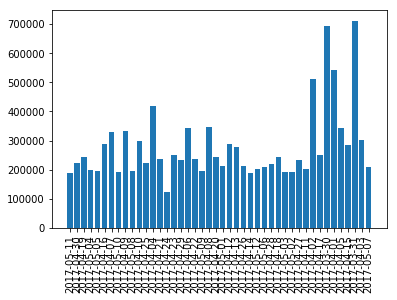

In [19]:
plt.bar(date_count['date'],date_count['count']);

plt.xticks(rotation='vertical');

# Label definition

In [20]:
import datetime
from dateutil import parser

label_window_size = 14
label_window_end_date = parser.parse('2017-05-12').date()
label_window_start_date = label_window_end_date - datetime.timedelta(label_window_size - 1)
print('label window:',label_window_start_date,'~',label_window_end_date,'days:',label_window_size)

feature_window_size = 30
feature_window_end_date = label_window_start_date - datetime.timedelta(1)
feature_window_start_date = feature_window_end_date  - datetime.timedelta(feature_window_size - 1)
print('feature window:',feature_window_start_date,'~',feature_window_end_date,'days:',feature_window_size)

label window: 2017-04-29 ~ 2017-05-12 days: 14
feature window: 2017-03-30 ~ 2017-04-28 days: 30


In [22]:
# all the uid we will model
df_model_uid = df.filter((F.col('date')>=feature_window_start_date) & (F.col('date')<=feature_window_end_date))\
                    .select('uid').distinct()
# active in label window (active label=0)
df_active_uid_in_label_window = df.filter((F.col('date')>=label_window_start_date) & (F.col('date')<=label_window_end_date))\
                            .select('uid').distinct().withColumn('label',F.lit(0))

In [24]:
# prepare label data (churn label=1; active label=0)
df_label = df_model_uid.join(df_active_uid_in_label_window,on=['uid'],how='left')
df_label = df_label.fillna(1)

In [25]:
df_label.groupBy('label').count().show()

+-----+-----+
|label|count|
+-----+-----+
|    1|35897|
|    0|22040|
+-----+-----+



# Feature generation

In [33]:
# event_data in feature_window
df_feature_window = df.filter((F.col('date')>=feature_window_start_date) & (F.col('date')<=feature_window_end_date))

### Frequency features

##### method 1

In [34]:
# define a function to generate frequency features
def frequency_feature_generation(df,event,time_window,snapshot_date):
    """
    generate frequency features for one event type and one time window
    """
    df_feature = df.filter(F.col('event')==event)\
            .filter((F.col('date')>=snapshot_date-datetime.timedelta(time_window-1)) & (F.col('date')<=snapshot_date))\
            .groupBy('uid').agg(F.count(F.col('uid')).alias('freq_'+event+'_last_'+str(time_window)))
    return df_feature

In [35]:
# generate one feature
event = 'S'
time_window = 3
snapshot_date = feature_window_end_date
df_feature = frequency_feature_generation(df_feature_window,event,time_window,snapshot_date)

In [36]:
df_feature.show(10)

+---------+-------------+
|      uid|freq_S_last_3|
+---------+-------------+
|167777847|            5|
|167859732|            4|
|167587246|            7|
|167908487|            7|
|167883821|            4|
|168215121|           10|
|168401805|           12|
|168278023|            1|
|168599918|            1|
|167921182|            1|
+---------+-------------+
only showing top 10 rows



In [37]:
df_feature.show(5)

+---------+-------------+
|      uid|freq_S_last_3|
+---------+-------------+
|167777847|            5|
|167859732|            4|
|167587246|            7|
|167908487|            7|
|167883821|            4|
+---------+-------------+
only showing top 5 rows



In [38]:
# generate frequency features for all event_list, time_window_list
event_list = ['P','D','S']
time_window_list = [1,3,7,14,30]
df_feature_list = []
for event in event_list:
    for time_window in time_window_list:
        df_feature_list.append(frequency_feature_generation(df_feature_window,event,time_window,snapshot_date))


In [40]:
df_feature_list

[DataFrame[uid: string, freq_P_last_1: bigint],
 DataFrame[uid: string, freq_P_last_3: bigint],
 DataFrame[uid: string, freq_P_last_7: bigint],
 DataFrame[uid: string, freq_P_last_14: bigint],
 DataFrame[uid: string, freq_P_last_30: bigint],
 DataFrame[uid: string, freq_D_last_1: bigint],
 DataFrame[uid: string, freq_D_last_3: bigint],
 DataFrame[uid: string, freq_D_last_7: bigint],
 DataFrame[uid: string, freq_D_last_14: bigint],
 DataFrame[uid: string, freq_D_last_30: bigint],
 DataFrame[uid: string, freq_S_last_1: bigint],
 DataFrame[uid: string, freq_S_last_3: bigint],
 DataFrame[uid: string, freq_S_last_7: bigint],
 DataFrame[uid: string, freq_S_last_14: bigint],
 DataFrame[uid: string, freq_S_last_30: bigint]]

##### method 2: too many dfs to join? do it another way

In [47]:
# define a function to generate frequency features for a list of time windows
# using when().otherwise(), and list comprehension trick!
def frequency_feature_generation_time_windows(df,event,time_window_list,snapshot_date):
    """
    generate frequency features for one event type and a list of time windows
    """
    df_feature = df \
        .filter(F.col('event')==event) \
        .groupBy('uid') \
        .agg(*[F.sum(F.when((F.col('date')>=snapshot_date-datetime.timedelta(time_window-1)) & (F.col('date')<=snapshot_date),1).otherwise(0)).alias('freq_'+event+'_last_'+str(time_window)) \
                for time_window in time_window_list]
            )# *[] opens list and make them comma separated
    return df_feature

In [52]:
# generate one event type, all time windows 
event = 'S'
time_window_list = [1,3,7,14,30]
snapshot_date = feature_window_end_date
df_feature = frequency_feature_generation_time_windows(df_feature_window,event,time_window_list,snapshot_date)
df_feature.show(5)

+---------+-------------+-------------+-------------+--------------+--------------+
|      uid|freq_S_last_1|freq_S_last_3|freq_S_last_7|freq_S_last_14|freq_S_last_30|
+---------+-------------+-------------+-------------+--------------+--------------+
|167587246|            6|            7|           21|            37|            75|
|168000523|            0|            0|            0|            33|            43|
|167718831|            8|            8|           14|            29|           129|
|167696079|            0|            0|            0|             4|            68|
|167820979|            0|            0|            0|             0|             3|
+---------+-------------+-------------+-------------+--------------+--------------+
only showing top 5 rows



In [49]:
# generate frequency features for all event_list, time_window_list
event_list = ['P','D','S']
time_window_list = [1,3,7,14,30]
df_feature_list = []
for event in event_list:
    df_feature_list.append(frequency_feature_generation_time_windows(df_feature_window,event,time_window_list,snapshot_date))


In [50]:
df_feature_list

[DataFrame[uid: string, freq_P_last_1: bigint, freq_P_last_3: bigint, freq_P_last_7: bigint, freq_P_last_14: bigint, freq_P_last_30: bigint],
 DataFrame[uid: string, freq_D_last_1: bigint, freq_D_last_3: bigint, freq_D_last_7: bigint, freq_D_last_14: bigint, freq_D_last_30: bigint],
 DataFrame[uid: string, freq_S_last_1: bigint, freq_S_last_3: bigint, freq_S_last_7: bigint, freq_S_last_14: bigint, freq_S_last_30: bigint]]

### Recency features

In [ ]:
# defined as days from last event
# can generate one feature for each type of event
def recency()

In [51]:
df_feature_window.show(5)

+---------+-----+-------+----------+
|      uid|event|song_id|      date|
+---------+-----+-------+----------+
|168551373|    P|3378911|2017-03-30|
|168550728|    P| 285233|2017-03-30|
|168530479|    P|1676759|2017-03-30|
|168551626|    P|8131487|2017-03-30|
|168535909|    P|7145935|2017-03-30|
+---------+-----+-------+----------+
only showing top 5 rows



In [56]:
df_feature_window.printSchema()

root
 |-- uid: string (nullable = true)
 |-- event: string (nullable = true)
 |-- song_id: string (nullable = true)
 |-- date: string (nullable = true)



In [59]:
from pyspark.sql.types import DateType

In [61]:
df_feature_window_1 = df_feature_window.withColumn('date1', df_feature_window['date'].cast(DateType()))

In [62]:
df_feature_window_1.show(5)

+---------+-----+-------+----------+----------+
|      uid|event|song_id|      date|     date1|
+---------+-----+-------+----------+----------+
|168551373|    P|3378911|2017-03-30|2017-03-30|
|168550728|    P| 285233|2017-03-30|2017-03-30|
|168530479|    P|1676759|2017-03-30|2017-03-30|
|168551626|    P|8131487|2017-03-30|2017-03-30|
|168535909|    P|7145935|2017-03-30|2017-03-30|
+---------+-----+-------+----------+----------+
only showing top 5 rows



In [81]:
df_feature_window_1.printSchema()

root
 |-- uid: string (nullable = true)
 |-- event: string (nullable = true)
 |-- song_id: string (nullable = true)
 |-- date: string (nullable = true)
 |-- date1: date (nullable = true)



In [83]:
df_feature_window_1.select(F.max('date1')).show()

+----------+
|max(date1)|
+----------+
|2017-04-28|
+----------+



In [91]:
# calculate recency
current_ts = F.to_utc_timestamp(F.unix_timestamp(F.lit(snapshot_date), 'yyyy-MM-dd').cast('timestamp'), 'UTC')

df_feature_window_1 = df_feature_window_1.withColumn('Days_before', F.datediff(F.lit(current_ts), 'date1'))

In [92]:
df_feature_window_1.show(5)

+---------+-----+-------+----------+----------+-----------+
|      uid|event|song_id|      date|     date1|Days_before|
+---------+-----+-------+----------+----------+-----------+
|168551373|    P|3378911|2017-03-30|2017-03-30|         29|
|168550728|    P| 285233|2017-03-30|2017-03-30|         29|
|168530479|    P|1676759|2017-03-30|2017-03-30|         29|
|168551626|    P|8131487|2017-03-30|2017-03-30|         29|
|168535909|    P|7145935|2017-03-30|2017-03-30|         29|
+---------+-----+-------+----------+----------+-----------+
only showing top 5 rows



In [93]:
df_recency = df_feature_window_1.filter(F.col('event') == 'P').groupby('uid').agg(F.min(F.col('Days_before')).alias('recency'))

In [94]:
df_recency.show(10)

+---------+-------+
|      uid|recency|
+---------+-------+
|168538840|     29|
|168542202|     29|
|168554264|      1|
|168574082|     29|
|168578629|      1|
|168579473|     22|
|168580671|      0|
|168532334|     26|
|168604132|     29|
|168613666|     29|
+---------+-------+
only showing top 10 rows



### Profile features

In [95]:
df_play = spark.read.csv('../../../../../../data/play/play_ds.csv',header=True)
df_play.show(5)

+---------+------+-------+----------+---------+-----------+
|      uid|device|song_id|      date|play_time|song_length|
+---------+------+-------+----------+---------+-----------+
|168551373|    ar|3378911|2017-03-30|       14|        212|
|168550728|    ar| 285233|2017-03-30|      282|        282|
|168530479|    ar|1676759|2017-03-30|      338|        338|
|168551626|    ar|8131487|2017-03-30|      247|        271|
|168535909|    ar|7145935|2017-03-30|      130|        130|
+---------+------+-------+----------+---------+-----------+
only showing top 5 rows



In [109]:
df_play_feature_window = df_play.filter((F.col('date')>=feature_window_start_date) & (F.col('date')<=feature_window_end_date))
df_profile_tmp = df_play_feature_window.select('uid','device').distinct()

In [97]:
df_profile_tmp.groupBy('device').count().show()

+------+-----+
|device|count|
+------+-----+
|    mc|    2|
|    ar|50505|
|    wp|    1|
|    ip| 7303|
+------+-----+



In [98]:
# check if one user has two devices
df_profile_tmp.count()

57811

In [99]:
df_profile_tmp.distinct().count()

57811

In [110]:
# only get the ar and ip as device
df_profile_tmp = df_profile_tmp.filter((F.col('device') == 'ar') | (F.col('device') == 'ip'))

In [111]:
df_profile_tmp.groupBy('device').count().show()

+------+-----+
|device|count|
+------+-----+
|    ar|50505|
|    ip| 7303|
+------+-----+



In [112]:
df_profile_tmp = df_profile_tmp.withColumn('device_type',F.when(F.col('device')=='ip',1).otherwise(2))
df_profile_tmp.groupBy('device_type').count().show()

+-----------+-----+
|device_type|count|
+-----------+-----+
|          1| 7303|
|          2|50505|
+-----------+-----+



In [113]:
df_profile = df_label.select('uid').join(df_profile_tmp.select('uid','device_type'),on='uid',how='left')
df_profile.groupBy('device_type').count().show()

+-----------+-----+
|device_type|count|
+-----------+-----+
|       null|  143|
|          1| 7303|
|          2|50505|
+-----------+-----+



### Total play time features

In [114]:
df_profile.show(10)

+---------+-----------+
|      uid|device_type|
+---------+-----------+
|120180992|          2|
|159613840|          2|
|160554394|          2|
|165374841|          2|
|167328646|          2|
|167515074|          2|
|167574187|          2|
|167581827|          2|
|167587246|          2|
|167597011|          2|
+---------+-----------+
only showing top 10 rows



In [115]:
df_play_feature_window.printSchema()

root
 |-- uid: string (nullable = true)
 |-- device: string (nullable = true)
 |-- song_id: string (nullable = true)
 |-- date: string (nullable = true)
 |-- play_time: string (nullable = true)
 |-- song_length: string (nullable = true)



In [120]:
# Can you generate total song play time features (using play_ds data) for different time window
# using play data (need to clean play time first, play time may be negative in data)
df_playtime_tmp = df_play_feature_window.filter(F.col('play_time') > 0)\
                .withColumn('play_time', df_play_feature_window['play_time'].cast('float'))

In [121]:
df_playtime_tmp.show(10)

+---------+------+--------+----------+---------+-----------+
|      uid|device| song_id|      date|play_time|song_length|
+---------+------+--------+----------+---------+-----------+
|168551373|    ar| 3378911|2017-03-30|     14.0|        212|
|168550728|    ar|  285233|2017-03-30|    282.0|        282|
|168530479|    ar| 1676759|2017-03-30|    338.0|        338|
|168551626|    ar| 8131487|2017-03-30|    247.0|        271|
|168535909|    ar| 7145935|2017-03-30|    130.0|        130|
|168534518|    ar|23492124|2017-03-30|     67.0|        167|
|168549973|    ip| 3194852|2017-03-30|      3.0|        644|
|168551235|    ar|  956342|2017-03-30|      5.0|        207|
|168551539|    ar| 1217815|2017-03-30|    138.0|        252|
|168547320|    ar|       0|2017-03-30|     52.0|        343|
+---------+------+--------+----------+---------+-----------+
only showing top 10 rows



In [132]:
# calculate the total song play time
def totalplaytime_feature_generation(df,device,time_window,snapshot_date):
    """
    generate frequency features for one event type and one time window
    """
    df_feature = df.filter(F.col('device')==device)\
            .filter((F.col('date')>=snapshot_date-datetime.timedelta(time_window-1)) & (F.col('date')<=snapshot_date))\
            .groupBy('uid').agg(F.round(F.sum(F.col('play_time'))).alias('playtime_'+event+'_last_'+str(time_window)))
    return df_feature

In [133]:
device = 'ip'
df_playtime_feature = totalplaytime_feature_generation(df_playtime_tmp, device, time_window, snapshot_date)

In [134]:
df_playtime_feature.show(5)

+---------+------------------+
|      uid|playtime_S_last_30|
+---------+------------------+
|168554264|           10434.0|
|168653273|            1082.0|
|168684092|            4476.0|
|168811798|          156656.0|
|168919019|            2378.0|
+---------+------------------+
only showing top 5 rows



### Fancier frequency features

In [ ]:
# Can you generate counts of songs play 80% of their song length (using play_ds data) for different time window
# using play data (need to clean play time and song length first, play time may be negative in data, song length may be zeros)


# Form training data

In [36]:
def join_feature_data(df_master,df_feature_list):
    for df_feature in df_feature_list:
        df_master = df_master.join(df_feature,on='uid',how='left')
        #df_master.persist() # uncomment if number of joins is too many
    return df_master
    

In [37]:
# join all behavior features
df_model_final = join_feature_data(df_label,df_feature_list)

In [38]:
# join all profile features
df_model_final = join_feature_data(df_model_final,[df_profile])

In [39]:
df_model_final.fillna(0).toPandas().to_csv('../data/df_model_final.csv',index=False)